In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download_DCT_train = drive.CreateFile({'id': 'put here id'})  
download_DCT_train.GetContentFile('dataset.zip')

In [ ]:
!unzip /content/dataset.zip -d /content/data

In [ ]:
def load_image(img_path, gray):
    if gray == True:
      img = load_img(img_path, color_mode = "grayscale")
    else:
        img = load_img(img_path)
    img_array = img_to_array(img)                            
    return img_array

In [ ]:
def get_image(path, gray = False):
    data =[]
    for subdir, dirs, files in os.walk(path):
        for f in files:
            path = os.path.join(subdir, f)
            img = load_image(path, gray)     
            data.append(img)
    return data

In [ ]:
#training dataset
input_training = get_image('/content/data/training/images/images')
mask_training = get_image('/content/data/training/masks/masks', True)

input_training = np.asarray(input_training)
mask_training = np.asarray(mask_training)/255.0


print(input_training.shape)
print(mask_training.shape)

(1143, 256, 256, 3)
(1143, 256, 256, 1)


In [ ]:
#validation dataset
input_val = get_image('/content/data/validation/images/images')
mask_val = get_image('/content/data/validation/masks/masks', True)

input_val = np.asarray(input_val)
mask_val = np.asarray(mask_val)/255.0

print(input_val.shape)
print(mask_val.shape)

(246, 256, 256, 3)
(246, 256, 256, 1)


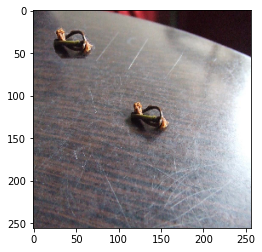

In [ ]:
img = array_to_img(input_training[1])
plt.imshow(img)

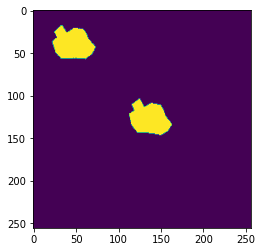

In [ ]:
mask = array_to_img(mask_training[1])
plt.imshow(mask)

In [ ]:
history = model.fit(
      input_training,
      mask_training,
      steps_per_epoch=np.ceil(1143/32), 
      epochs=3,
      verbose=1,
      validation_data=(input_val, mask_val),
      validation_steps=np.ceil(246/32)
)